# "Introduction to PySpark"
> "In this course, you'll learn how to use Spark from Python! Spark is a tool for doing parallel computation with large datasets and it integrates well with Python. PySpark is the Python package that makes the magic happen. You'll use this package to work with data about flights from Portland and Seattle. You'll learn to wrangle this data and build a whole machine learning pipeline to predict whether or not flights will be delayed. Get ready to put some Spark in your Python code and dive into the world of high-performance machine learning!"
- toc: true
- branch: master
- badges: true
- comments: true
- author: Islam Mansour
- categories: [Python, DataCamp, Machine Learning Scientist with Python, Big Data with PySpark, Data Engineer with Python]
- hide: false

Introduction to PySpark
---



**Course Description:**

In this course, you'll learn how to use Spark from Python! Spark is a tool for doing parallel computation with large datasets and it integrates well with Python. PySpark is the Python package that makes the magic happen. You'll use this package to work with data about flights from Portland and Seattle. You'll learn to wrangle this data and build a whole machine learning pipeline to predict whether or not flights will be delayed. Get ready to put some Spark in your Python code and dive into the world of high-performance machine learning!

In [2]:
! pip install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 40.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=fab35528b694432280a1206b41c03efeef4945f96ea5965e75c2cf01dba9f583
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [5]:
import pyspark
import numpy as np
import pandas as pd

# 1. Getting to know PySpark


In this chapter, you'll learn how Spark manages data and how can you read and write tables from Python.



## 1.1 What is Spark, anyway?


Spark is a platform for cluster computing. Spark lets you spread data and computations over _clusters_ with multiple _nodes_ (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed _in parallel_ over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.

However, with greater computing power comes greater complexity.

Deciding whether or not Spark is the best solution for your problem takes some experience, but you can consider questions like:

- Is my data too big to work with on a single machine?
- Can my calculations be easily parallelized?

* * *

Are you excited to learn more about Spark?

##### Answer the question

**50XP**

#### Possible Answers

- No way!
    
- Yes way!
    


## 1.2 Using Spark in Python


The first step in using Spark is connecting to a cluster.

In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the _master_ that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called _worker_. The master sends the workers data and calculations to run, and they send their results back to the master.

When you're just getting started with Spark it's simpler to just run a cluster locally. Thus, for this course, instead of connecting to another computer, all computations will be run on DataCamp's servers in a simulated cluster.

Creating the connection is as simple as creating an instance of the `SparkContext` class. The class constructor takes a few optional arguments that allow you to specify the attributes of the cluster you're connecting to.

An object holding all these attributes can be created with the `SparkConf()` constructor. Take a look at the [documentation](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html) for all the details!

For the rest of this course you'll have a `SparkContext` called `sc` already available in your workspace.

* * *

How do you connect to a Spark cluster from PySpark?

##### Answer the question

**50XP**

#### Possible Answers

- **Create an instance of the `SparkContext` class.**

- Import the `pyspark` library.
    
- Plug your computer into the cluster.
    
    
Great job! I knew you were paying attention.

## 1.3 Examining The SparkContext


In this exercise you'll get familiar with the `SparkContext`.

You'll probably notice that code takes longer to run than you might expect. This is because Spark is some serious software. It takes more time to start up than you might be used to. You may also find that running simpler computations might take longer than expected. That's because all the optimizations that Spark has under its hood are designed for complicated operations with big data sets. That means that for simple or small problems Spark may actually perform worse than some other solutions!

##### Instructions

**100 XP**

Get to know the `SparkContext`.

- Call `print()` on `sc` to verify there's a `SparkContext` in your environment.
- `print()` `sc.version` to see what version of Spark is running on your cluster.

In [6]:
sc = pyspark.SparkContext()


In [7]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

<SparkContext master=local[*] appName=pyspark-shell>
3.2.0


Awesome! You're up and running with Spark.



## 1.4 Using DataFrames


Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so in this course you'll be using the Spark DataFrame abstraction built on top of RDDs.

The Spark DataFrame was designed to behave a lot like a SQL table (a table with variables in the columns and observations in the rows). Not only are they easier to understand, DataFrames are also more optimized for complicated operations than RDDs.

When you start modifying and combining columns and rows of data, there are many ways to arrive at the same result, but some often take much longer than others. When using RDDs, it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!

To start working with Spark DataFrames, you first have to create a `SparkSession` object from your `SparkContext`. You can think of the `SparkContext` as your connection to the cluster and the `SparkSession` as your interface with that connection.

Remember, for the rest of this course you'll have a `SparkSession` called `spark` available in your workspace!

* * *

Which of the following is an advantage of Spark DataFrames over RDDs?

##### Answer the question

**50XP**

#### Possible Answers

- **Operations using DataFrames are automatically optimized.**
    
- They are smaller.
    
- They can perform more kinds of operations.
        
- They can hold more kinds of data.

Exactly! This is another way DataFrames are like SQL tables.

## 1.5 Creating a SparkSession


In [9]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(my_spark)

Great work! You did that like a PySpark Pro!



## 1.6 Viewing tables


Once you've created a `SparkSession`, you can start poking around to see what data is in your cluster!

Your `SparkSession` has an attribute called `catalog` which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the `.listTables()` method, which returns the names of all the tables in your cluster as a list.

##### Instructions

**100 XP**

- See what tables are in your cluster by calling `spark.catalog.listTables()` and printing the result!

In [ ]:
spark = (SparkSession
  .builder
  .appName("flights")
  .getOrCreate())

# Path to data set
csv_file = "./dataset/flights_small.csv"

# Read and create a temporary view
# Infer schema (note that for larger files you 
# may want to specify the schema)
flights = (spark.read.format("csv")
  .option("inferSchema", "true")
  .option("header", "true")
  .load(csv_file))
flights.createOrReplaceTempView("flights")

In [10]:
# Print the tables in the catalog
print(spark.catalog.listTables())

Fantastic! What kind of data do you think is in that table?



## 1.7 Are you query-ious?


One of the advantages of the DataFrame interface is that you can run SQL queries on the tables in your Spark cluster. If you don't have any experience with SQL, don't worry, we'll provide you with queries! (To learn more SQL, start with our [Introduction to SQL](https://www.datacamp.com/courses/intro-to-sql-for-data-science) course.)

As you saw in the last exercise, one of the tables in your cluster is the `flights` table. This table contains a row for every flight that left Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) in 2014 and 2015.

Running a query on this table is as easy as using the `.sql()` method on your `SparkSession`. This method takes a string containing the query and returns a DataFrame with the results!

If you look closely, you'll notice that the table `flights` is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.

Remember, we've already created a `SparkSession` called `spark` in your workspace. (It's no longer called `my_spark` because we created it for you!)

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Use the `.sql()` method to get the first 10 rows of the `flights` table and save the result to `flights10`. The variable `query` contains the appropriate SQL query.
- Use the DataFrame method `.show()` to print `flights10`.

In [ ]:
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

Awesome work! You've got queries down!



## 1.8 Pandafy a Spark DataFrame


Suppose you've run a query on your huge dataset and aggregated it down to something a little more manageable.

Sometimes it makes sense to then take that table and work with it locally using a tool like `pandas`. Spark DataFrames make that easy with the `.toPandas()` method. Calling this method on a Spark DataFrame returns the corresponding `pandas` DataFrame. It's as simple as that!

This time the query counts the number of flights to each airport from SEA and PDX.

Remember, there's already a `SparkSession` called `spark` in your workspace!

##### Instructions

**100 XP**

- Run the query using the `.sql()` method. Save the result in `flight_counts`.
- Use the `.toPandas()` method on `flight_counts` to create a `pandas` DataFrame called `pd_counts`.
- Print the `.head()` of `pd_counts` to the console.

In [ ]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

Great job! You did it!



## 1.9 Put some Spark in your data


In the last exercise, you saw how to move data from Spark to `pandas`. However, maybe you want to go the other direction, and put a `pandas` DataFrame into a Spark cluster! The `SparkSession` class has a method for this as well.

The `.createDataFrame()` method takes a `pandas` DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the `SparkSession` catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the `.sql()` method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a _temporary table_.

You can do this using the `.createTempView()` Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific `SparkSession` used to create the Spark DataFrame.

There is also the method `.createOrReplaceTempView()`. This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

Check out the diagram to see all the different ways your Spark data structures interact with each other.

![](https://s3.amazonaws.com/assets.datacamp.com/production/course_4452/datasets/spark_figure.png)

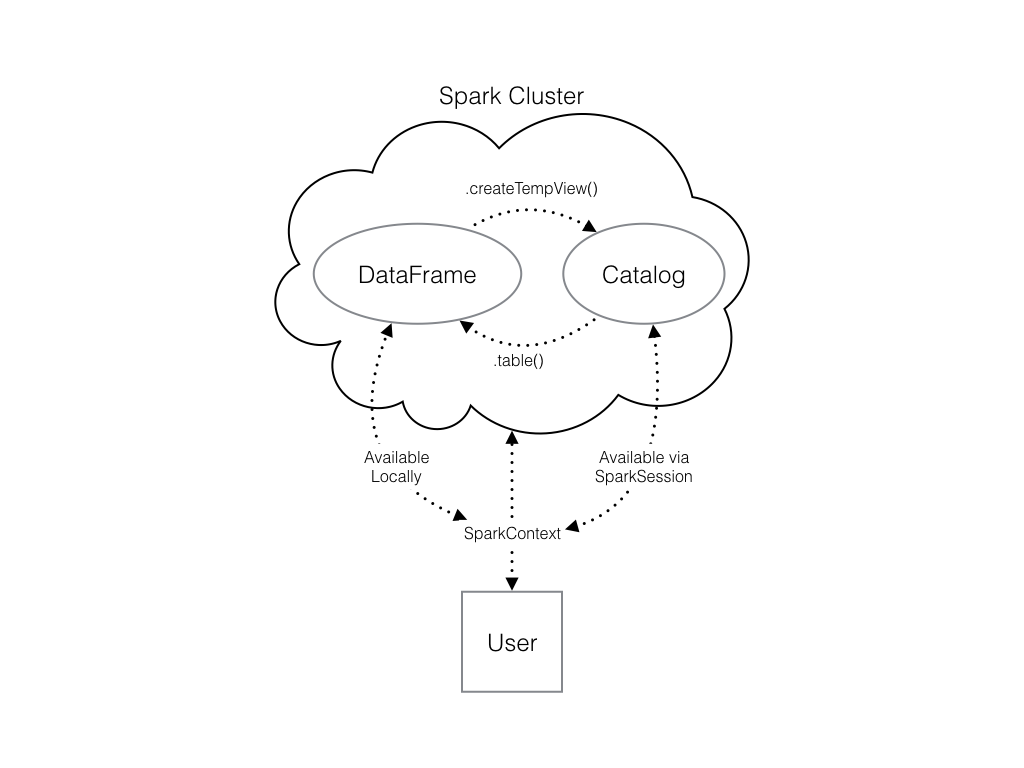

There's already a `SparkSession` called `spark` in your workspace, `numpy` has been imported as `np`, and `pandas` as `pd`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- The code to create a `pandas` DataFrame of random numbers has already been provided and saved under `pd_temp`.
- Create a Spark DataFrame called `spark_temp` by calling the Spark method `.createDataFrame()` with `pd_temp` as the argument.
- Examine the list of tables in your Spark cluster and verify that the new DataFrame is _not_ present. Remember you can use `spark.catalog.listTables()` to do so.
- Register the `spark_temp` DataFrame you just created as a temporary table using the `.createOrReplaceTempView()` method. THe temporary table should be named `"temp"`. Remember that the table name is set including it as the only argument to your method!
- Examine the list of tables again.

In [ ]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView('temp')

# Examine the tables in the catalog again
print(spark.catalog.listTables())

Awesome! Now you can get your data in and out of Spark.



## 1.10 Dropping the middle man

Now you know how to put data into Spark via `pandas`, but you're probably wondering why deal with `pandas` at all? Wouldn't it be easier to just read a text file straight into Spark? Of course it would!

Luckily, your `SparkSession` has a `.read` attribute which has several methods for reading different data sources into Spark DataFrames. Using these you can create a DataFrame from a .csv file just like with regular `pandas` DataFrames!

The variable `file_path` is a string with the path to the file `airports.csv`. This file contains information about different airports all over the world.

A `SparkSession` named `spark` is available in your workspace.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Use the `.read.csv()` method to create a Spark DataFrame called `airports`
    - The first argument is `file_path`
    - Pass the argument `header=True` so that Spark knows to take the column names from the first line of the file.
- Print out this DataFrame by calling `.show()`.

In [ ]:
# Don't change this file path
file_path = "/usr/local/share/datasets/airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()


Awesome job! You've got the basics of Spark under your belt!



# 2. Manipulating data

In this chapter, you'll learn about the pyspark.sql module, which provides optimized data queries to your Spark session.




## 2.1 Creating columns


In this chapter, you'll learn how to use the methods defined by Spark's `DataFrame` class to perform common data operations.

Let's look at performing column-wise operations. In Spark you can do this using the `.withColumn()` method, which takes two arguments. First, a string with the name of your new column, and second the new column itself.

The new column must be an object of class `Column`. Creating one of these is as easy as extracting a column from your DataFrame using `df.colName`.

Updating a Spark DataFrame is somewhat different than working in `pandas` because the Spark DataFrame is _immutable_. This means that it can't be changed, and so columns can't be updated in place.

Thus, all these methods return a new DataFrame. To overwrite the original DataFrame you must reassign the returned DataFrame using the method like so:

```
df = df.withColumn("newCol", df.oldCol + 1)
```

The above code creates a DataFrame with the same columns as `df` plus a new column, `newCol`, where every entry is equal to the corresponding entry from `oldCol`, plus one.

To overwrite an existing column, just pass the name of the column as the first argument!

Remember, a `SparkSession` called `spark` is already in your workspace.

##### Instructions

**100 XP**

- Use the `spark.table()` method with the argument `"flights"` to create a DataFrame containing the values of the `flights` table in the `.catalog`. Save it as `flights`.
- Show the head of `flights` using `flights.show()`. Check the output: the column `air_time` contains the duration of the flight in minutes.
- Update `flights` to include a new column called `duration_hrs`, that contains the duration of each flight in hours (you'll need to divide `air_time` by the number of minutes in an hour).

In [ ]:
# Create the DataFrame flights
flights = spark.table('flights')

# Show the head
flights.show()

# Add duration_hrs
flights = flights.withColumn('duration_hrs', flights.air_time / 60)

## 2.2 SQL in a nutshell


As you move forward, it will help to have a basic understanding of SQL. A more in depth look can be found [here](https://www.datacamp.com/courses/intro-to-sql-for-data-science).

A SQL query returns a table derived from one or more tables contained in a database.

Every SQL query is made up of commands that tell the database what you want to do with the data. The two commands that every query has to contain are `SELECT` and `FROM`.

The `SELECT` command is followed by the _columns_ you want in the resulting table.

The `FROM` command is followed by the name of the table that contains those columns. The minimal SQL query is:

```
SELECT * FROM my_table;
```

The `*` selects all columns, so this returns the entire table named `my_table`.

Similar to `.withColumn()`, you can do column-wise computations within a `SELECT` statement. For example,

```
SELECT origin, dest, air_time / 60 FROM flights;
```

returns a table with the origin, destination, and duration in hours for each flight.

Another commonly used command is `WHERE`. This command filters the rows of the table based on some logical condition you specify. The resulting table contains the rows where your condition is true. For example, if you had a table of students and grades you could do:

```
SELECT * FROM students
WHERE grade = 'A';
```

to select all the columns and the rows containing information about students who got As.

* * *

Which of the following queries returns a table of tail numbers and destinations for flights that lasted more than 10 hours?

##### Answer the question

**50XP**

#### Possible Answers

- `SELECT dest, tail_num FROM flights WHERE air_time > 10;`
    
    
- **`SELECT dest, tail_num FROM flights WHERE air_time > 600;`**
    
    
- `SELECT * FROM flights WHERE air_time > 600;`

Great work! You're a SQL wizard!



## 2.3 SQL in a nutshell (2)


Another common database task is aggregation. That is, reducing your data by breaking it into chunks and summarizing each chunk.

This is done in SQL using the `GROUP BY` command. This command breaks your data into groups and applies a function from your `SELECT` statement to each group.

For example, if you wanted to count the number of flights from each of two origin destinations, you could use the query

```
SELECT COUNT(*) FROM flights
GROUP BY origin;
```

`GROUP BY origin` tells SQL that you want the output to have a row for each unique value of the `origin` column. The `SELECT` statement selects the values you want to populate each of the columns. Here, we want to `COUNT()` every row in each of the groups.

It's possible to `GROUP BY` more than one column. When you do this, the resulting table has a row for every combination of the unique values in each column. The following query counts the number of flights from SEA and PDX to every destination airport:

```
SELECT origin, dest, COUNT(*) FROM flights
GROUP BY origin, dest;
```

The output will have a row for every combination of the values in `origin` and `dest` (i.e. a row listing each origin and destination that a flight flew to). There will also be a column with the `COUNT()` of all the rows in each group.

Remember, a more in depth look at SQL can be found [here](https://www.datacamp.com/courses/intro-to-sql-for-data-science).

* * *

What information would this query get? Remember the `flights` table holds information about flights that departed PDX and SEA in 2014 and 2015. Note that `AVG()` function gets the average value of a column!

```
SELECT AVG(air_time) / 60 FROM flights
GROUP BY origin, carrier;
```

##### Answer the question

**50XP**

#### Possible Answers

- **The average length of each airline's flights from SEA and from PDX in hours.**
    
    
- The average length of each flight.
    
    
- The average length of each airline's flights.

Awesome! You've got this SQL stuff down!



## 2.4 Filtering Data


Now that you have a bit of SQL know-how under your belt, it's easier to talk about the analogous operations using Spark DataFrames.

Let's take a look at the `.filter()` method. As you might suspect, this is the Spark counterpart of SQL's `WHERE` clause. The `.filter()` method takes either an expression that would follow the `WHERE` clause of a SQL expression as a string, or a Spark Column of boolean (`True`/`False`) values.

For example, the following two expressions will produce the same output:

```
flights.filter("air_time > 120").show()
flights.filter(flights.air_time > 120).show()
```

Notice that in the first case, we pass a _string_ to `.filter()`. In SQL, we would write this filtering task as `SELECT * FROM flights WHERE air_time > 120`. Spark's `.filter()` can accept any expression that could go in the `WHERE`clause of a SQL query (in this case, `"air_time > 120"`), as long as it is passed as a string. Notice that in this case, we do not reference the name of the table in the string -- as we wouldn't in the SQL request.

In the second case, we actually pass a _column of boolean values_ to `.filter()`. Remember that `flights.air_time > 120` returns a column of boolean values that has `True` in place of those records in `flights.air_time` that are over 120, and `False` otherwise.

Remember, a `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

- Use the `.filter()` method to find all the flights that flew over 1000 miles two ways:
    - First, pass a SQL **string** to `.filter()` that checks whether the distance is greater than 1000. Save this as `long_flights1`.
    - Then pass a column of boolean values to `.filter()` that checks the same thing. Save this as `long_flights2`.
- Use `.show()` to print heads of both DataFrames and make sure they're actually equal!

In [ ]:
# Filter flights by passing a string
long_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_flights1.show()
long_flights2.show()

Awesome! PySpark often provides a few different ways to get the same results.



## 2.5 Selecting


The Spark variant of SQL's `SELECT` is the `.select()` method. This method takes multiple arguments - one for each column you want to select. These arguments can either be the column name as a string (one for each column) or a column object (using the `df.colName` syntax). When you pass a column object, you can perform operations like addition or subtraction on the column to change the data contained in it, much like inside `.withColumn()`.

The difference between `.select()` and `.withColumn()` methods is that `.select()` returns only the columns you specify, while `.withColumn()` returns all the columns of the DataFrame in addition to the one you defined. It's often a good idea to drop columns you don't need at the beginning of an operation so that you're not dragging around extra data as you're wrangling. In this case, you would use `.select()` and not `.withColumn()`.

Remember, a SparkSession called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

- Select the columns `"tailnum"`, `"origin"`, and `"dest"` from `flights` by passing the column names as strings. Save this as `selected1`.
- Select the columns `"origin"`, `"dest"`, and `"carrier"` using the `df.colName` syntax and then filter the result using both of the filters already defined for you (`filterA` and `filterB`) to only keep flights from SEA to PDX. Save this as `selected2`.

In [ ]:
# Select the first set of columns
selected1 = flights.select("tailnum", "origin", "dest")

# Select the second set of columns
temp = flights.select(flights.origin, flights.dest, flights.carrier)

# Define first filter
filterA = flights.origin == "SEA"

# Define second filter
filterB = flights.dest == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)


Great work! You're speeding right through this course!



## 2.6 Selecting II


Similar to SQL, you can also use the `.select()` method to perform column-wise operations. When you're selecting a column using the `df.colName` notation, you can perform any column operation and the `.select()` method will return the transformed column. For example,

```
flights.select(flights.air_time/60)
```

returns a column of flight durations in hours instead of minutes. You can also use the `.alias()` method to rename a column you're selecting. So if you wanted to `.select()` the column `duration_hrs` (which isn't in your DataFrame) you could do

```
flights.select((flights.air_time/60).alias("duration_hrs"))
```

The equivalent Spark DataFrame method `.selectExpr()` takes SQL expressions as a string:

```
flights.selectExpr("air_time/60 as duration_hrs")
```

with the SQL `as` keyword being equivalent to the `.alias()` method. To select multiple columns, you can pass multiple strings.

Remember, a `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

Create a table of the average speed of each flight both ways.

- Calculate average speed by dividing the `distance` by the `air_time` (converted to hours). Use the `.alias()` method name this column `"avg_speed"`. Save the output as the variable `avg_speed`.
- Select the columns `"origin", "dest", "tailnum"`, and `avg_speed` (without quotes!). Save this as `speed1`.
- Create the same table using `.selectExpr()` and a string containing a SQL expression. Save this as `speed2`.

In [ ]:
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select("origin", "dest", "tailnum", avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) as avg_speed")

Wow! You're doing great!



## 2.7 Aggregating


All of the common aggregation methods, like `.min()`, `.max()`, and `.count()` are `GroupedData` methods. These are created by calling the `.groupBy()` DataFrame method. You'll learn exactly what that means in a few exercises. For now, all you have to do to use these functions is call that method on your DataFrame. For example, to find the minimum value of a column, `col`, in a DataFrame, `df`, you could do

```
df.groupBy().min("col").show()
```

This creates a `GroupedData` object (so you can use the `.min()` method), then finds the minimum value in `col`, and returns it as a DataFrame.

Now you're ready to do some aggregating of your own!

A `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

- Find the length of the shortest (in terms of distance) flight that left PDX by first `.filter()`ing and using the `.min()` method. Perform the filtering by referencing the column directly, not passing a SQL string.
- Find the length of the longest (in terms of time) flight that left SEA by `filter()`ing and using the `.max()` method. Perform the filtering by referencing the column directly, not passing a SQL string.

In [ ]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.origin == 'PDX').groupBy().min('distance').show()

# Find the longest flight from SEA in terms of air time
flights.filter(flights.origin == 'SEA').groupBy().max('air_time').show()


Fantastic work! How do these methods help you learn about your data?



## 2.8 Aggregating II


To get you familiar with more of the built in aggregation methods, here's a few more exercises involving the `flights` table!

Remember, a `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

- Use the `.avg()` method to get the average air time of Delta Airlines flights (where the `carrier` column has the value `"DL"`) that left SEA. The place of departure is stored in the column `origin`. `show()` the result.
- Use the `.sum()` method to get the total number of hours all planes in this dataset spent in the air by creating a column called `duration_hrs` from the column `air_time`. `show()` the result.

In [ ]:
# Average duration of Delta flights
flights.filter(flights.carrier == 'DL').filter(flights.origin == 'SEA').groupBy().avg('air_time').show()

# Total hours in the air
flights.withColumn('duration_hrs', flights.air_time / 60).groupBy().sum('duration_hrs').show()


Stellar job! Now you can answer some interesting questions about the data.

```python
<script.py> output:
    +------------------+
    |     avg(air_time)|
    +------------------+
    |188.20689655172413|
    +------------------+
    
    +------------------+
    | sum(duration_hrs)|
    +------------------+
    |25289.600000000126|
    +------------------+
    

```

## 2.9 Grouping and Aggregating I


Part of what makes aggregating so powerful is the addition of groups. PySpark has a whole class devoted to grouped data frames: `pyspark.sql.GroupedData`, which you saw in the last two exercises.

You've learned how to create a grouped DataFrame by calling the `.groupBy()` method on a DataFrame with no arguments.

Now you'll see that when you pass the name of one or more columns in your DataFrame to the `.groupBy()` method, the aggregation methods behave like when you use a `GROUP BY` statement in a SQL query!

Remember, a `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Create a DataFrame called `by_plane` that is grouped by the column `tailnum`.
- Use the `.count()` method with no arguments to count the number of flights each plane made.
- Create a DataFrame called `by_origin` that is grouped by the column `origin`.
- Find the `.avg()` of the `air_time` column to find average duration of flights from PDX and SEA.

In [ ]:
# Group by tailnum
by_plane = flights.groupBy('tailnum')

# Number of flights each plane made
by_plane.count().show()

# Group by origin
by_origin = flights.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg('air_time').show()

Great work! You're passing with flying colors!

```python
<script.py> output:
    +-------+-----+
    |tailnum|count|
    +-------+-----+
    | N442AS|   38|
    | N102UW|    2|
    | N36472|    4|
    | N38451|    4|
    | N73283|    4|
    | N513UA|    2|
    | N954WN|    5|
    | N388DA|    3|
    | N567AA|    1|
    | N516UA|    2|
    | N927DN|    1|
    | N8322X|    1|
    | N466SW|    1|
    |  N6700|    1|
    | N607AS|   45|
    | N622SW|    4|
    | N584AS|   31|
    | N914WN|    4|
    | N654AW|    2|
    | N336NW|    1|
    +-------+-----+
    only showing top 20 rows
    
    +------+------------------+
    |origin|     avg(air_time)|
    +------+------------------+
    |   SEA| 160.4361496051259|
    |   PDX|137.11543248288737|
    +------+------------------+
    
```

## 2.10 Grouping and Aggregating II


In addition to the `GroupedData` methods you've already seen, there is also the `.agg()` method. This method lets you pass an aggregate column expression that uses any of the aggregate functions from the `pyspark.sql.functions` submodule.

This submodule contains many useful functions for computing things like standard deviations. All the aggregation functions in this submodule take the name of a column in a `GroupedData` table.

Remember, a `SparkSession` called `spark` is already in your workspace, along with the Spark DataFrame `flights`. The grouped DataFrames you created in the last exercise are also in your workspace.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import the submodule `pyspark.sql.functions` as `F`.
- Create a `GroupedData` table called `by_month_dest` that's grouped by both the `month` and `dest` columns. Refer to the two columns by passing both strings as separate arguments.
- Use the `.avg()` method on the `by_month_dest` DataFrame to get the average `dep_delay` in each month for each destination.
- Find the standard deviation of `dep_delay` by using the `.agg()` method with the function `F.stddev()`.

In [ ]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

# Group by month and est
by_month_dest = flights.groupBy('month', 'dest')

# Average departure delay by month and destination
by_month_dest.avg('dep_delay').show()

# Standard deviation of departure delay
by_month_dest.agg(F.stddev('dep_delay')).show()

Amazing! You're learning so much from just a few simple methods!

```python
<script.py> output:
    +-----+----+--------------------+
    |month|dest|      avg(dep_delay)|
    +-----+----+--------------------+
    |   11| TUS| -2.3333333333333335|
    |   11| ANC|   7.529411764705882|
    |    1| BUR|               -1.45|
    |    1| PDX| -5.6923076923076925|
    |    6| SBA|                -2.5|
    |    5| LAX|-0.15789473684210525|
    |   10| DTW|                 2.6|
    |    6| SIT|                -1.0|
    |   10| DFW|  18.176470588235293|
    |    3| FAI|                -2.2|
    |   10| SEA|                -0.8|
    |    2| TUS| -0.6666666666666666|
    |   12| OGG|  25.181818181818183|
    |    9| DFW|   4.066666666666666|
    |    5| EWR|               14.25|
    |    3| RDM|                -6.2|
    |    8| DCA|                 2.6|
    |    7| ATL|   4.675675675675675|
    |    4| JFK| 0.07142857142857142|
    |   10| SNA| -1.1333333333333333|
    +-----+----+--------------------+
    only showing top 20 rows
    
    +-----+----+----------------------+
    |month|dest|stddev_samp(dep_delay)|
    +-----+----+----------------------+
    |   11| TUS|    3.0550504633038935|
    |   11| ANC|    18.604716401245316|
    |    1| BUR|     15.22627576540667|
    |    1| PDX|     5.677214918493858|
    |    6| SBA|     2.380476142847617|
    |    5| LAX|     13.36268698685904|
    |   10| DTW|     5.639148871948674|
    |    6| SIT|                   NaN|
    |   10| DFW|     45.53019017606675|
    |    3| FAI|    3.1144823004794873|
    |   10| SEA|     18.70523227029577|
    |    2| TUS|    14.468356276140469|
    |   12| OGG|     82.64480404939947|
    |    9| DFW|    21.728629347782924|
    |    5| EWR|     42.41595968929191|
    |    3| RDM|      2.16794833886788|
    |    8| DCA|     9.946523680831074|
    |    7| ATL|    22.767001039582183|
    |    4| JFK|     8.156774303176903|
    |   10| SNA|    13.726234873756304|
    +-----+----+----------------------+
    only showing top 20 rows
    
```

## 2.11 Joining


Another very common data operation is the _join_. Joins are a whole topic unto themselves, so in this course we'll just look at simple joins. If you'd like to learn more about joins, you can take a look [here](https://www.datacamp.com/courses/merging-dataframes-with-pandas).

A join will combine two different tables along a column that they share. This column is called the _key_. Examples of keys here include the `tailnum` and `carrier` columns from the `flights` table.

For example, suppose that you want to know more information about the plane that flew a flight than just the tail number. This information isn't in the `flights` table because the same plane flies many different flights over the course of two years, so including this information in every row would result in a lot of duplication. To avoid this, you'd have a second table that has only one row for each plane and whose columns list all the information about the plane, including its tail number. You could call this table `planes`

When you join the `flights` table to this table of airplane information, you're adding all the columns from the `planes` table to the `flights` table. To fill these columns with information, you'll look at the tail number from the `flights` table and find the matching one in the `planes` table, and then use that row to fill out all the new columns.

Now you'll have a much bigger table than before, but now every row has all information about the plane that flew that flight!

* * *

Which of the following is **not** true?

##### Answer the question

**50XP**

#### Possible Answers

- Joins combine tables.
    
    
- Joins add information to a table.
    
    
- Storing information in separate tables can reduce repetition.
    
    
- **There is only one kind of join.**

Great job! If there were only one kind of join, it would be tough to create some more complicated kinds of tables.



## 2.12 Joining II

In PySpark, joins are performed using the DataFrame method `.join()`. This method takes three arguments. The first is the second DataFrame that you want to join with the first one. The second argument, `on`, is the name of the key column(s) as a string. The names of the key column(s) must be the same in each table. The third argument, `how`, specifies the kind of join to perform. In this course we'll always use the value `how="leftouter"`.

The `flights` dataset and a new dataset called `airports` are already in your workspace.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Examine the `airports` DataFrame by calling `.show()`. Note which key column will let you join `airports` to the `flights` table.
- Rename the `faa` column in `airports` to `dest` by re-assigning the result of `airports.withColumnRenamed("faa", "dest")` to `airports`.
- Join the `flights` with the `airports` DataFrame on the `dest` column by calling the `.join()` method on `flights`. Save the result as `flights_with_airports`.
    - The first argument should be the other DataFrame, `airports`.
    - The argument `on` should be the key column.
    - The argument `how` should be `"leftouter"`.
- Call `.show()` on `flights_with_airports` to examine the data again. Note the new information that has been added.

In [ ]:
# Examine the data
print(airports.show())

# rename the faa column
airports = airports.withColumnRenamed('faa', 'dest')

# Joint the DataFrames
flights_with_airports = flights.join(airports, on='dest', how='leftouter')

# Examine the new DataFrame
print(flights_with_airports.show())

Fantastic work! You're a data manipulation pro!

```python
<script.py> output:
    +---+--------------------+----------------+-----------------+----+---+---+
    |faa|                name|             lat|              lon| alt| tz|dst|
    +---+--------------------+----------------+-----------------+----+---+---+
    |04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
    |06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
    |06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
    |06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
    |09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
    |0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
    |0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
    |0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
    |0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
    |0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
    |0W3|Harford County Ai...|      39.5668378|      -76.2024028| 409| -5|  A|
    |10C|  Galt Field Airport|      42.4028889|      -88.3751111| 875| -6|  U|
    |17G|Port Bucyrus-Craw...|      40.7815556|      -82.9748056|1003| -5|  A|
    |19A|Jackson County Ai...|      34.1758638|      -83.5615972| 951| -4|  U|
    |1A3|Martin Campbell F...|      35.0158056|      -84.3468333|1789| -4|  A|
    |1B9| Mansfield Municipal|      42.0001331|      -71.1967714| 122| -5|  A|
    |1C9|Frazier Lake Airpark|54.0133333333333|-124.768333333333| 152| -8|  A|
    |1CS|Clow Internationa...|      41.6959744|      -88.1292306| 670| -6|  U|
    |1G3|  Kent State Airport|      41.1513889|      -81.4151111|1134| -4|  A|
    |1OH|     Fortman Airport|      40.5553253|      -84.3866186| 885| -5|  U|
    +---+--------------------+----------------+-----------------+----+---+---+
    only showing top 20 rows
    
    None
    +----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+--------------------+---------+-----------+----+---+---+
    |dest|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|air_time|distance|hour|minute|                name|      lat|        lon| alt| tz|dst|
    +----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+--------------------+---------+-----------+----+---+---+
    | LAX|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA|     132|     954|   6|    58|    Los Angeles Intl|33.942536|-118.408075| 126| -8|  A|
    | HNL|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA|     360|    2677|  10|    40|       Honolulu Intl|21.318681|-157.922428|  13|-10|  N|
    | SFO|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA|     111|     679|  14|    43|  San Francisco Intl|37.618972|-122.374889|  13| -8|  A|
    | SJC|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX|      83|     569|  17|     5|Norman Y Mineta S...|  37.3626|-121.929022|  62| -8|  A|
    | BUR|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA|     127|     937|   7|    54|            Bob Hope|34.200667|-118.358667| 778| -8|  A|
    | DEN|2014|    1| 15|    1037|        7|    1352|        2|     WN| N646SW|    48|   PDX|     121|     991|  10|    37|         Denver Intl|39.861656|-104.673178|5431| -7|  A|
    | OAK|2014|    7|  2|     847|       42|    1041|       51|     WN| N422WN|  1520|   PDX|      90|     543|   8|    47|Metropolitan Oakl...|37.721278|-122.220722|   9| -8|  A|
    | SFO|2014|    5| 12|    1655|       -5|    1842|      -18|     VX| N361VA|   755|   SEA|      98|     679|  16|    55|  San Francisco Intl|37.618972|-122.374889|  13| -8|  A|
    | SAN|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA|     135|    1050|  12|    36|      San Diego Intl|32.733556|-117.189667|  17| -8|  A|
    | ORD|2014|   11| 19|    1812|       -3|    2352|       -4|     AS| N564AS|    26|   SEA|     198|    1721|  18|    12|  Chicago Ohare Intl|41.978603| -87.904842| 668| -6|  A|
    | LAX|2014|   11|  8|    1653|       -2|    1924|       -1|     AS| N323AS|   448|   SEA|     130|     954|  16|    53|    Los Angeles Intl|33.942536|-118.408075| 126| -8|  A|
    | PHX|2014|    8|  3|    1120|        0|    1415|        2|     AS| N305AS|   656|   SEA|     154|    1107|  11|    20|Phoenix Sky Harbo...|33.434278|-112.011583|1135| -7|  N|
    | LAS|2014|   10| 30|     811|       21|    1038|       29|     AS| N433AS|   608|   SEA|     127|     867|   8|    11|      Mc Carran Intl|36.080056| -115.15225|2141| -8|  A|
    | ANC|2014|   11| 12|    2346|       -4|     217|      -28|     AS| N765AS|   121|   SEA|     183|    1448|  23|    46|Ted Stevens Ancho...|61.174361|-149.996361| 152| -9|  A|
    | SFO|2014|   10| 31|    1314|       89|    1544|      111|     AS| N713AS|   306|   SEA|     129|     679|  13|    14|  San Francisco Intl|37.618972|-122.374889|  13| -8|  A|
    | SFO|2014|    1| 29|    2009|        3|    2159|        9|     UA| N27205|  1458|   PDX|      90|     550|  20|     9|  San Francisco Intl|37.618972|-122.374889|  13| -8|  A|
    | SMF|2014|   12| 17|    2015|       50|    2150|       41|     AS| N626AS|   368|   SEA|      76|     605|  20|    15|     Sacramento Intl|38.695417|-121.590778|  27| -8|  A|
    | MDW|2014|    8| 11|    1017|       -3|    1613|       -7|     WN| N8634A|   827|   SEA|     216|    1733|  10|    17| Chicago Midway Intl|41.785972| -87.752417| 620| -6|  A|
    | BOS|2014|    1| 13|    2156|       -9|     607|      -15|     AS| N597AS|    24|   SEA|     290|    2496|  21|    56|General Edward La...|42.364347| -71.005181|  19| -5|  A|
    | BUR|2014|    6|  5|    1733|      -12|    1945|      -10|     OO| N215AG|  3488|   PDX|     111|     817|  17|    33|            Bob Hope|34.200667|-118.358667| 778| -8|  A|
    +----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+--------------------+---------+-----------+----+---+---+
    only showing top 20 rows
    
    None
```

# 3. Getting started with machine learning pipelines

PySpark has built-in, cutting-edge machine learning routines, along with utilities to create full machine learning pipelines. You'll learn about them in this chapter.




## 3.1 Machine Learning Pipelines


In the next two chapters you'll step through every stage of the machine learning pipeline, from data intake to model evaluation. Let's get to it!

At the core of the `pyspark.ml` module are the `Transformer` and `Estimator` classes. Almost every other class in the module behaves similarly to these two basic classes.

`Transformer` classes have a `.transform()` method that takes a DataFrame and returns a new DataFrame; usually the original one with a new column appended. For example, you might use the class `Bucketizer` to create discrete bins from a continuous feature or the class `PCA` to reduce the dimensionality of your dataset using principal component analysis.

`Estimator` classes all implement a `.fit()` method. These methods also take a DataFrame, but instead of returning another DataFrame they return a model object. This can be something like a `StringIndexerModel` for including categorical data saved as strings in your models, or a `RandomForestModel` that uses the random forest algorithm for classification or regression.

* * *

Which of the following is **not** true about machine learning in Spark?

##### Answer the question

**50XP**

#### Possible Answers

- **Spark's algorithms give better results than other algorithms.**

- Working in Spark allows you to create reproducible machine learning pipelines.

- Machine learning pipelines in Spark are made up of `Transformer`s and `Estimator`s.
    
- PySpark uses the `pyspark.ml` submodule to interface with Spark's machine learning routines.

That's right! Spark is just a platform that implements the same algorithms that can be found elsewhere.



## 3.2 Join the DataFrames


In the next two chapters you'll be working to build a model that predicts whether or not a flight will be delayed based on the flights data we've been working with. This model will also include information about the plane that flew the route, so the first step is to join the two tables: `flights` and `planes`!

##### Instructions

**100 XP**

- First, rename the `year` column of `planes` to `plane_year` to avoid duplicate column names.
- Create a new DataFrame called `model_data` by joining the `flights` table with `planes` using the `tailnum` column as the key.

In [ ]:
# Rename year column
planes = planes.withColumnRenamed('year', 'plane_year')

# Join the DataFrame
model_data = flights.join(planes, on='tailnum', how='leftouter')

Awesome work! You're one step closer to a model!

## 3.3 Data types


Good work! Before you get started modeling, it's important to know that Spark only handles numeric data. That means all of the columns in your DataFrame must be either integers or decimals (called 'doubles' in Spark).

When we imported our data, we let Spark guess what kind of information each column held. Unfortunately, Spark doesn't always guess right and you can see that some of the columns in our DataFrame are strings containing numbers as opposed to actual numeric values.

To remedy this, you can use the `.cast()` method in combination with the `.withColumn()` method. It's important to note that `.cast()` works on columns, while `.withColumn()` works on DataFrames.

The only argument you need to pass to `.cast()` is the kind of value you want to create, in string form. For example, to create integers, you'll pass the argument `"integer"` and for decimal numbers you'll use `"double"`.

You can put this call to `.cast()` inside a call to `.withColumn()` to overwrite the already existing column, just like you did in the previous chapter!

* * *

What kind of data does Spark need for modeling?

##### Answer the question

**50XP**

#### Possible Answers

- Doubles
    
    
- Integers
    
    
- Decimals
    
    
- **Numeric**
    
    
- Strings

Great job! Spark needs numeric values (doubles or integers) to do machine learning.



## 3.4 String to integer


Now you'll use the `.cast()` method you learned in the previous exercise to convert all the appropriate columns from your DataFrame `model_data` to integers!

To convert the type of a column using the `.cast()` method, you can write code like this:

```
dataframe = dataframe.withColumn("col", dataframe.col.cast("new_type"))
```

##### Instructions

**100 XP**

- Use the method `.withColumn()` to `.cast()` the following columns to type `"integer"`. Access the columns using the `df.col` notation:
    - `model_data.arr_delay`
    - `model_data.air_time`
    - `model_data.month`
    - `model_data.plane_year`

In [ ]:
# Cast the columns to integers
model_data = model_data.withColumn("arr_delay", model_data.arr_delay.cast('integer'))
model_data = model_data.withColumn('air_time', model_data.air_time.cast('integer'))
model_data = model_data.withColumn('month', model_data.month.cast('integer'))
model_data = model_data.withColumn('plane_year', model_data.plane_year.cast('integer'))

Awesome! You're a pro at converting columns!



## 3.5 Create a new column


In the last exercise, you converted the column `plane_year` to an integer. This column holds the year each plane was manufactured. However, your model will use the planes' _age_, which is slightly different from the year it was made!

##### Instructions

**100 XP**

- Create the column `plane_age` using the `.withColumn()` method and subtracting the year of manufacture (column `plane_year`) from the year (column `year`) of the flight.

In [ ]:
# Create the column plane_age
model_data = model_data.withColumn('plane_age', model_data.year - model_data.plane_year)


Great work! Now you have one more variable to include in your model.



## 3.6 Making a Boolean


Consider that you're modeling a yes or no question: is the flight late? However, your data contains the arrival delay in minutes for each flight. Thus, you'll need to create a boolean column which indicates whether the flight was late or not!

##### Instructions

**100 XP**

- Use the `.withColumn()` method to create the column `is_late`. This column is equal to `model_data.arr_delay > 0`.
- Convert this column to an integer column so that you can use it in your model and name it `label` (this is the default name for the response variable in Spark's machine learning routines).
- Filter out missing values (this has been done for you).

In [ ]:
# Create is_late
model_data = model_data.withColumn('is_late', model_data.arr_delay > 0)

# Convert to an integer
model_data = model_data.withColumn('label', model_data.is_late.cast('integer'))

# Remove missing values
model_data = model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")

Awesome! Now you've defined the column that you're going to use as the outcome in your model.



## 3.7 Strings and factors


As you know, Spark requires numeric data for modeling. So far this hasn't been an issue; even boolean columns can easily be converted to integers without any trouble. But you'll also be using the airline and the plane's destination as features in your model. These are coded as strings and there isn't any obvious way to convert them to a numeric data type.

Fortunately, PySpark has functions for handling this built into the `pyspark.ml.features` submodule. You can create what are called 'one-hot vectors' to represent the carrier and the destination of each flight. A _one-hot vector_ is a way of representing a categorical feature where every observation has a vector in which all elements are zero except for at most one element, which has a value of one (1).

Each element in the vector corresponds to a level of the feature, so it's possible to tell what the right level is by seeing which element of the vector is equal to one (1).

The first step to encoding your categorical feature is to create a `StringIndexer`. Members of this class are `Estimator`s that take a DataFrame with a column of strings and map each unique string to a number. Then, the `Estimator` returns a `Transformer` that takes a DataFrame, attaches the mapping to it as metadata, and returns a new DataFrame with a numeric column corresponding to the string column.

The second step is to encode this numeric column as a one-hot vector using a `OneHotEncoder`. This works exactly the same way as the `StringIndexer` by creating an `Estimator` and then a `Transformer`. The end result is a column that encodes your categorical feature as a vector that's suitable for machine learning routines!

This may seem complicated, but don't worry! All you have to remember is that you need to create a `StringIndexer` and a `OneHotEncoder`, and the `Pipeline` will take care of the rest.

* * *

Why do you have to encode a categorical feature as a one-hot vector?

##### Answer the question

**50XP**

#### Possible Answers

- It makes fitting the model faster.
    
    
- **Spark can only model numeric features.**
    
    
- For compatibility with `scikit-learn`.
    

Awesome! You remembered that Spark can only model numeric features.



## 3.8 Carrier


In this exercise you'll create a `StringIndexer` and a `OneHotEncoder` to code the `carrier` column. To do this, you'll call the class constructors with the arguments `inputCol` and `outputCol`.

The `inputCol` is the name of the column you want to index or encode, and the `outputCol` is the name of the new column that the `Transformer` should create.

##### Instructions

**100 XP**

- Create a `StringIndexer` called `carr_indexer` by calling `StringIndexer()` with `inputCol="carrier"` and `outputCol="carrier_index"`.
- Create a `OneHotEncoder` called `carr_encoder` by calling `OneHotEncoder()` with `inputCol="carrier_index"` and `outputCol="carrier_fact"`.

In [ ]:
# Create StringIndexer
carr_indexer = StringIndexer(inputCol='carrier', outputCol='carrier_index')

# Create a OneHotEncoder
carr_encoder = OneHotEncoder(inputCol='carrier_index', outputCol='carrier_fact')

## 3.9 Destination


Now you'll encode the `dest` column just like you did in the previous exercise.

##### Instructions

**100 XP**

- Create a `StringIndexer` called `dest_indexer` by calling `StringIndexer()` with `inputCol="dest"` and `outputCol="dest_index"`.
- Create a `OneHotEncoder` called `dest_encoder` by calling `OneHotEncoder()` with `inputCol="dest_index"` and `outputCol="dest_fact"`.

In [ ]:
# Create a StringIndexer
dest_indexer = StringIndexer(inputCol='dest', outputCol='dest_index')

# Create a OneHotEncoder
dest_encoder = OneHotEncoder(inputCol='dest_index', outputCol='dest_fact')

Perfect! You're all done messing with factors.



## 3.10 Assemble a vector


The last step in the `Pipeline` is to combine all of the columns containing our features into a single column. This has to be done before modeling can take place because every Spark modeling routine expects the data to be in this form. You can do this by storing each of the values from a column as an entry in a vector. Then, from the model's point of view, every observation is a vector that contains all of the information about it and a label that tells the modeler what value that observation corresponds to.

Because of this, the `pyspark.ml.feature` submodule contains a class called `VectorAssembler`. This `Transformer` takes all of the columns you specify and combines them into a new vector column.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Create a `VectorAssembler` by calling `VectorAssembler()` with the `inputCols` names as a list and the `outputCol` name `"features"`.
    - The list of columns should be `["month", "air_time", "carrier_fact", "dest_fact", "plane_age"]`.

In [ ]:
# Make a VectorAssembler
vec_assembler = VectorAssembler(inputCols=["month", "air_time", "carrier_fact", "dest_fact", "plane_age"],
                outputCol='features')

Good job! Your data is all assembled now.



## 3.11 Create the pipeline


You're finally ready to create a `Pipeline`!

`Pipeline` is a class in the `pyspark.ml` module that combines all the `Estimators` and `Transformers` that you've already created. This lets you reuse the same modeling process over and over again by wrapping it up in one simple object. Neat, right?

##### Instructions

**100 XP**

- Import `Pipeline` from `pyspark.ml`.
- Call the `Pipeline()` constructor with the keyword argument `stages` to create a `Pipeline` called `flights_pipe`.
    - `stages` should be a list holding all the stages you want your data to go through in the pipeline. Here this is just: `[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler]`

In [ ]:
# Import Pipeline
from pyspark.ml import Pipeline

# Make the pipeline
flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler])


Fantastic! You've made a fully reproducible machine learning pipeline!



## 3.12 Test vs Train


After you've cleaned your data and gotten it ready for modeling, one of the most important steps is to split the data into a _test set_ and a _train set_. After that, don't touch your test data until you think you have a good model! As you're building models and forming hypotheses, you can test them on your training data to get an idea of their performance.

Once you've got your favorite model, you can see how well it predicts the new data in your test set. This never-before-seen data will give you a much more realistic idea of your model's performance in the real world when you're trying to predict or classify new data.

In Spark it's important to make sure you split the data **after** all the transformations. This is because operations like `StringIndexer` don't always produce the same index even when given the same list of strings.

* * *

Why is it important to use a test set in model evaluation?

##### Answer the question

**50XP**

#### Possible Answers

- Evaluating your model improves its accuracy.

- **By evaluating your model with a test set you can get a good idea of performance on new data.**

- Using a test set lets you check your code for errors.

Exactly! A test set approximates the 'real world error' of your model.



## 3.13 Transform the data


Hooray, now you're finally ready to pass your data through the `Pipeline` you created!

##### Instructions

**100 XP**

- Create the DataFrame `piped_data` by calling the `Pipeline` methods `.fit()` and `.transform()` in a chain. Both of these methods take `model_data` as their only argument.

In [ ]:
# Fit and transform the data
piped_data = flights_pipe.fit(model_data).transform(model_data)

Great work! Your pipeline chewed right through that data!



## 3.14 Split the data

Now that you've done all your manipulations, the last step before modeling is to split the data!

##### Instructions

**100 XP**

- Use the DataFrame method `.randomSplit()` to split `piped_data` into two pieces, `training` with 60% of the data, and `test` with 40% of the data by passing the list `[.6, .4]` to the `.randomSplit()` method.

In [ ]:
# Split the data into training and test sets
training, test = piped_data.randomSplit([.6, .4])

Awesome! Now you're ready to start fitting a model!



# 4. Model tuning and selection

In this last chapter, you'll apply what you've learned to create a model that predicts which flights will be delayed.




## 4.1 What is logistic regression?


The model you'll be fitting in this chapter is called a _logistic regression_. This model is very similar to a linear regression, but instead of predicting a numeric variable, it predicts the probability (between 0 and 1) of an event.

To use this as a classification algorithm, all you have to do is assign a cutoff point to these probabilities. If the predicted probability is above the cutoff point, you classify that observation as a 'yes' (in this case, the flight being late), if it's below, you classify it as a 'no'!

You'll tune this model by testing different values for several _hyperparameters_. A _hyperparameter_ is just a value in the model that's not estimated from the data, but rather is supplied by the user to maximize performance. For this course it's not necessary to understand the mathematics behind all of these values - what's important is that you'll try out a few different choices and pick the best one.

* * *

Why do you supply hyperparameters?

##### Answer the question

**50XP**

#### Possible Answers

- They explain information about the data.
    
    
- **They improve model performance.**
        
- They improve model fitting speed.

Great job! You supply hyperparameters to optimize your model.



## 4.2 Create the modeler


The `Estimator` you'll be using is a `LogisticRegression` from the `pyspark.ml.classification` submodule.

##### Instructions

**100 XP**

- Import the `LogisticRegression` class from `pyspark.ml.classification`.
- Create a `LogisticRegression` called `lr` by calling `LogisticRegression()` with no arguments.

In [ ]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression Estimator
lr = LogisticRegression()

Great work! That's the first step to any modeling in PySpark.



## 4.3 Cross validation


In the next few exercises you'll be tuning your logistic regression model using a procedure called _k-fold cross validation_. This is a method of estimating the model's performance on unseen data (like your `test` DataFrame).

It works by splitting the training data into a few different partitions. The exact number is up to you, but in this course you'll be using PySpark's default value of three. Once the data is split up, one of the partitions is set aside, and the model is fit to the others. Then the error is measured against the held out partition. This is repeated for each of the partitions, so that every block of data is held out and used as a test set exactly once. Then the error on each of the partitions is averaged. This is called the _cross validation error_ of the model, and is a good estimate of the actual error on the held out data.

You'll be using cross validation to choose the hyperparameters by creating a grid of the possible pairs of values for the two hyperparameters, `elasticNetParam` and `regParam`, and using the cross validation error to compare all the different models so you can choose the best one!

What does cross validation allow you to estimate?

* * *

##### Answer the question

**50XP**

#### Possible Answers

- **The model's error on held out data.**
    
- The model's error on data used for fitting.
    
- The time it will take to fit the model.

Exactly! The cross validation error is an estimate of the model's error on the test set.



## 4.4 Create the evaluator


The first thing you need when doing cross validation for model selection is a way to compare different models. Luckily, the `pyspark.ml.evaluation` submodule has classes for evaluating different kinds of models. Your model is a binary classification model, so you'll be using the `BinaryClassificationEvaluator` from the `pyspark.ml.evaluation` module.

This evaluator calculates the area under the ROC. This is a metric that combines the two kinds of errors a binary classifier can make (false positives and false negatives) into a simple number. You'll learn more about this towards the end of the chapter!

##### Instructions

**100 XP**

- Import the submodule `pyspark.ml.evaluation` as `evals`.
- Create `evaluator` by calling `evals.BinaryClassificationEvaluator()` with the argument `metricName="areaUnderROC"`.

In [ ]:
# Import the evaluation submodule
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

Perfect! Now you can compare models using the metric output by your evaluator!



## 4.5 Make a grid


Next, you need to create a grid of values to search over when looking for the optimal hyperparameters. The submodule `pyspark.ml.tuning` includes a class called `ParamGridBuilder` that does just that (maybe you're starting to notice a pattern here; PySpark has a submodule for just about everything!).

You'll need to use the `.addGrid()` and `.build()` methods to create a grid that you can use for cross validation. The `.addGrid()` method takes a model parameter (an attribute of the model `Estimator`, `lr`, that you created a few exercises ago) and a list of values that you want to try. The `.build()` method takes no arguments, it just returns the grid that you'll use later.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import the submodule `pyspark.ml.tuning` under the alias `tune`.
- Call the class constructor `ParamGridBuilder()` with no arguments. Save this as `grid`.
- Call the `.addGrid()` method on `grid` with `lr.regParam` as the first argument and `np.arange(0, .1, .01)` as the second argument. This second call is a function from the `numpy` module (imported `as np`) that creates a list of numbers from 0 to .1, incrementing by .01. Overwrite `grid` with the result.
- Update `grid` again by calling the `.addGrid()` method a second time create a grid for `lr.elasticNetParam` that includes only the values `[0, 1]`.
- Call the `.build()` method on `grid` and overwrite it with the output.

In [ ]:
# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0, 1])

# Build the grid
grid = grid.build()

Awesome! That's the last ingredient in your cross validation recipe!



## 4.6 Make the validator


The submodule `pyspark.ml.tuning` also has a class called `CrossValidator` for performing cross validation. This `Estimator` takes the modeler you want to fit, the grid of hyperparameters you created, and the evaluator you want to use to compare your models.

The submodule `pyspark.ml.tune` has already been imported as `tune`. You'll create the `CrossValidator` by passing it the logistic regression `Estimator` `lr`, the parameter `grid`, and the `evaluator` you created in the previous exercises.

##### Instructions

**100 XP**

- Create a `CrossValidator` by calling `tune.CrossValidator()` with the arguments:
    - `estimator=lr`
    - `estimatorParamMaps=grid`
    - `evaluator=evaluator`
- Name this object `cv`.

In [ ]:
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator
               )

Great job! You're almost a machine learning pro!



## 4.7 Fit the model(s)


You're finally ready to fit the models and select the best one!

Unfortunately, cross validation is a very computationally intensive procedure. Fitting all the models would take too long on DataCamp.

To do this locally you would use the code:

```
# Fit cross validation models
models = cv.fit(training)

# Extract the best model
best_lr = models.bestModel
```

Remember, the training data is called `training` and you're using `lr` to fit a logistic regression model. Cross validation selected the parameter values `regParam=0` and `elasticNetParam=0` as being the best. These are the default values, so you don't need to do anything else with `lr` before fitting the model.

##### Instructions

**100 XP**

- Create `best_lr` by calling `lr.fit()` on the `training` data.
- Print `best_lr` to verify that it's an object of the `LogisticRegressionModel` class.

In [ ]:
# Call lr.fit()
best_lr = lr.fit(training)

# Print best_lr
print(best_lr)

Wow! You fit your first Spark model!



## 4.8 Evaluating binary classifiers


 For this course we'll be using a common metric for binary classification algorithms call the _AUC_, or area under the curve. In this case, the curve is the ROC, or receiver operating curve. The details of what these things actually measure isn't important for this course. All you need to know is that for our purposes, the closer the AUC is to one (1), the better the model is!

* * *

If you've created a perfect binary classification model, what would the AUC be?

##### Answer the question

**50XP**

#### Possible Answers

- \-1

- 1

- 0

- .5

Great job! An AUC of one represents a model that always perfectly classifies observations.



## 4.9 Evaluate the model

Remember the test data that you set aside waaaaaay back in chapter 3? It's finally time to test your model on it! You can use the same evaluator you made to fit the model.

##### Instructions

**100 XP**

- Use your model to generate predictions by applying `best_lr.transform()` to the `test` data. Save this as `test_results`.
- Call `evaluator.evaluate()` on `test_results` to compute the AUC. Print the output.

In [ ]:
# Use the model to predict the test set
test_results = best_lr.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))

Congratulations! What do you think of the AUC? Your model isn't half bad! You went from knowing nothing about Spark to doing advanced machine learning. Great job on making it to the end of the course! The next steps are learning how to create large scale Spark clusters and manage and submit jobs so that you can use models in the real world. Check out some of the other DataCamp courses that use Spark! And remember, Spark is still being actively developed, so there's new features coming all the time!